# AVANCE PROYECTO: Parte 2 #

1. El dataset utilizado proviene de Kaggle, del archivo coin_Bitcoin.csv, el cual contiene el historial de precios de la criptomoneda Bitcoin.

- Fuente: https://www.kaggle.com/datasets/sudalairajkumar/cryptocurrencypricehistory?select=coin_Bitcoin.csv 

- Problema de aprendizaje: Serie temporal supervisada para la predicción de precios futuros de Bitcoin, usando deep learning en específico LSTM

- Número de instancias: Aprox. 3000 filas

- Número de características: 7 columnas

Date: Fecha y hora del registro.

Open: Precio de apertura.

High: Precio más alto del día.

Low: Precio más bajo del día.

Close: Precio de cierre.

Volume: Volumen de transacciones diarias.

Market Cap: Capitalización de mercado del día.

Predicción: Close

2. Preprocesamiento 1:

- converción de columna date para que pandas pueda leer bien
- Eliminación de columnas inecesarias
- Visualización con gráficos

3. No se usó metodos para extracción de caracteristicas como PCA porque no tiene demasiados atributos y puedo meter fácilmente las columnas en la arquitectura del LSTM como multivaluado.

4. Como se trata de un problema de serie temporal, se mantiene la secuencia crónologica de los datos.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("coin_Bitcoin.csv")

df

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Bitcoin,BTC,2013-04-29 23:59:59,147.488007,134.000000,134.444000,144.539993,0.000000e+00,1.603769e+09
1,2,Bitcoin,BTC,2013-04-30 23:59:59,146.929993,134.050003,144.000000,139.000000,0.000000e+00,1.542813e+09
2,3,Bitcoin,BTC,2013-05-01 23:59:59,139.889999,107.720001,139.000000,116.989998,0.000000e+00,1.298955e+09
3,4,Bitcoin,BTC,2013-05-02 23:59:59,125.599998,92.281898,116.379997,105.209999,0.000000e+00,1.168517e+09
4,5,Bitcoin,BTC,2013-05-03 23:59:59,108.127998,79.099998,106.250000,97.750000,0.000000e+00,1.085995e+09
...,...,...,...,...,...,...,...,...,...,...
2986,2987,Bitcoin,BTC,2021-07-02 23:59:59,33939.588699,32770.680780,33549.600177,33897.048590,3.872897e+10,6.354508e+11
2987,2988,Bitcoin,BTC,2021-07-03 23:59:59,34909.259899,33402.696536,33854.421362,34668.548402,2.438396e+10,6.499397e+11
2988,2989,Bitcoin,BTC,2021-07-04 23:59:59,35937.567147,34396.477458,34665.564866,35287.779766,2.492431e+10,6.615748e+11
2989,2990,Bitcoin,BTC,2021-07-05 23:59:59,35284.344430,33213.661034,35284.344430,33746.002456,2.672155e+10,6.326962e+11


In [2]:
# eliminar columnas no necesarias
df = df.drop(columns=["SNo", "Name", "Symbol"])

# convierto date a formato datetime sino no agara las fechas IMPORTANTE
df["Date"] = pd.to_datetime(df["Date"])

df

,Date,High,Low,Open,Close,Volume,Marketcap
0,2013-04-29 23:59:59,147.488007,134.000000,134.444000,144.539993,0.000000e+00,1.603769e+09
1,2013-04-30 23:59:59,146.929993,134.050003,144.000000,139.000000,0.000000e+00,1.542813e+09
2,2013-05-01 23:59:59,139.889999,107.720001,139.000000,116.989998,0.000000e+00,1.298955e+09
3,2013-05-02 23:59:59,125.599998,92.281898,116.379997,105.209999,0.000000e+00,1.168517e+09
4,2013-05-03 23:59:59,108.127998,79.099998,106.250000,97.750000,0.000000e+00,1.085995e+09
...,...,...,...,...,...,...,...
2986,2021-07-02 23:59:59,33939.588699,32770.680780,33549.600177,33897.048590,3.872897e+10,6.354508e+11
2987,2021-07-03 23:59:59,34909.259899,33402.696536,33854.421362,34668.548402,2.438396e+10,6.499397e+11
2988,2021-07-04 23:59:59,35937.567147,34396.477458,34665.564866,35287.779766,2.492431e+10,6.615748e+11
2989,2021-07-05 23:59:59,35284.344430,33213.661034,35284.344430,33746.002456,2.672155e+10,6.326962e+11


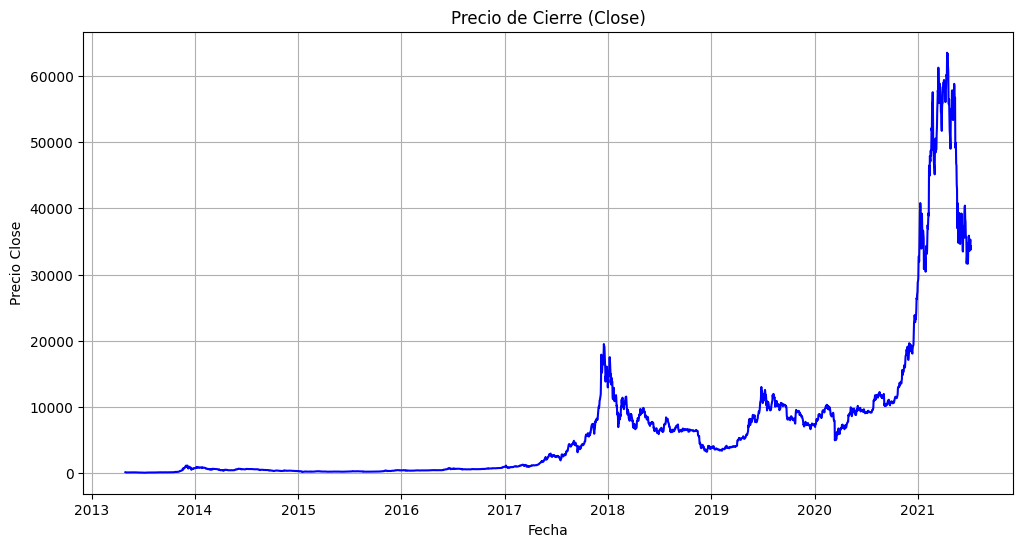

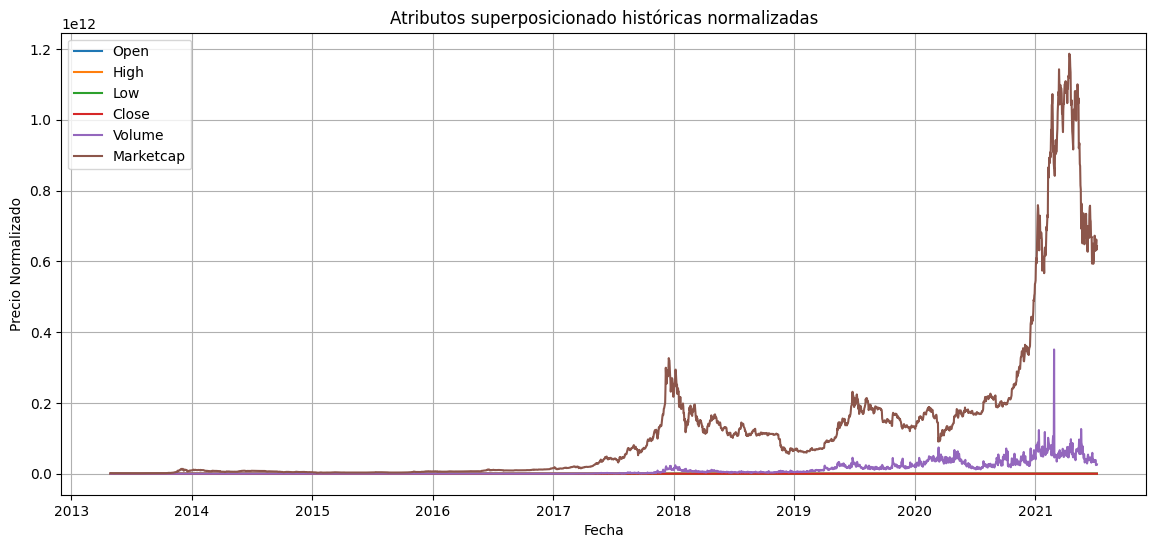

In [3]:

# gráfica Close vs Tiempo
plt.figure(figsize=(12,6))
plt.plot(df['Date'], df['Close'], color='blue')
plt.title('Precio de Cierre (Close)')
plt.xlabel('Fecha')
plt.ylabel('Precio Close')
plt.grid()
plt.show()

# columnas numericas
columnas_num = ['Open', 'High', 'Low', 'Close', 'Volume', 'Marketcap']


# gráfico de tendencias históricas superpociocionadas 
plt.figure(figsize=(14,6))
for col in columnas_num:
    plt.plot(df['Date'], df[col], label=col)
plt.title("Atributos superposicionado históricas normalizadas")
plt.xlabel("Fecha")
plt.ylabel("Precio Normalizado")
plt.legend()
plt.grid()
plt.show()



# AVANCE PROYECTO: Parte3 #

In [4]:
# Pasamos la columna del tiempo a que sea nuestro índice

df = df.set_index("Date") 

# Aunque ya este ordenado, es imporante rectificar el ordenaimento ascendente
df.sort_index(inplace=True)

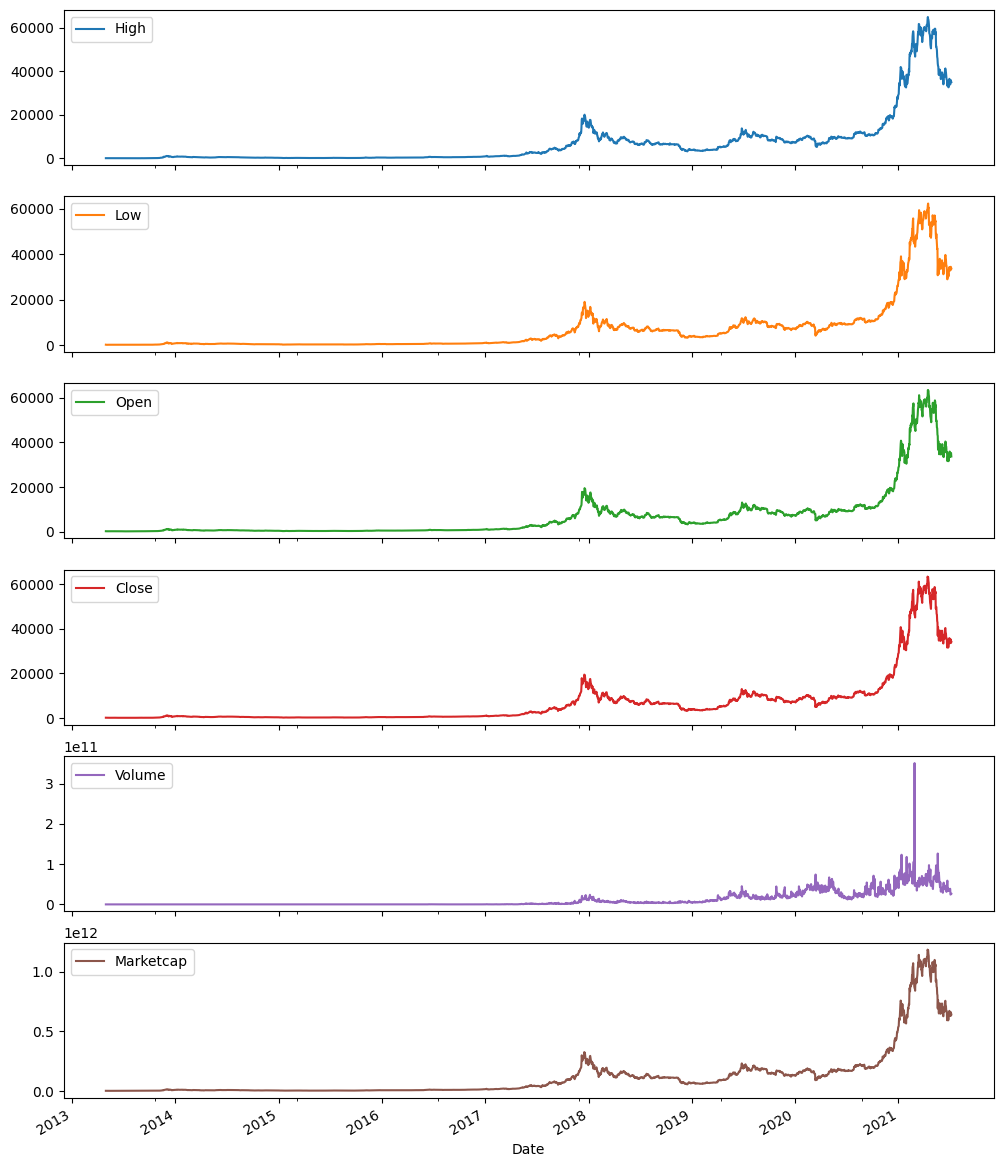

In [5]:
# https://www.youtube.com/watch?v=uY3M3AI0usw
# por CodificandoBits

cols = df.columns

# N = 24*30*12 1 año continuo
N = df.shape[0]
plots = df[cols][0:N]
plots.index =  df.index[0:N]
_ = plots.plot(subplots = True, figsize=(12, 16))

In [6]:
#Verificamos si hay datos incompletos

print("cantidad de NANs")
for column in df:
    nans = df[column].isna().sum()
    print(f"\tColumna {column}: { nans}")

cantidad de NANs
	Columna High: 0
	Columna Low: 0
	Columna Open: 0
	Columna Close: 0
	Columna Volume: 0
	Columna Marketcap: 0


In [7]:
# Verificar la periocididad de los datos
# en este caso el dataframe ya nos dice que los regisros son cada 24 hrs

#calculamos diferencias (en segundos) entre cada par de datos consecutivos

df_time_diffs = df.index.to_series().diff().dt.total_seconds()
print(df_time_diffs.value_counts())

Date
86400.0    2990
Name: count, dtype: int64


Son 86400 segundos en 24 horas, está bien.

### Datos NaNs ### 
Si son pocos datos faltantes podemos hacer interpolación lineal para completar datos faltantes

for column in columns:
    df[column] = df[column].interpolaye(method = "linear")

Verificar que no hay datos faltantes:

print("cantidad de NANs")
for column in df:
    nans = df[column].isna().sum()
    print(f"\tColumna {column}: { nans}")

### Datos desfazados y/o duplicados ###
Eliminar duplicados (si tienen diferencia de cero segundos)

df.drop_duplicates(keep="first", inplace = True, ignore_index = False)

Verificar que han sido eliminados:

df_time_diffs = df.index.to_series().diff().dt.total_seconds()
print(df_time_diffs.value_counts())

Para los datos con registros de tiempo diferentes usamos el método **asfrec** (permite reinterpolar para tener la misma frecuencia) de pandas y como aparecerán nuevos datos usaremos el metodo bfill para rellenar estos nuevos datos:

df2 = df.asfreq(freq = "H", method = "bfill")

Verificar que se tiene misma frecuencia periódica:

df_time_diffs = df2.index.to_series().diff().dt.total_seconds()
print(df_time_diffs.value_counts())


Por ultimo verificar otra vez que no se tiene Nans.

print("cantidad de NANs")
for column in df:
    nans = df[column].isna().sum()
    print(f"\tColumna {column}: { nans}")

### Verificar las columnas originales y modificadas para constatar que los valores promedio no cambian ###

for column in df:
    print(f"Promedios original/modificado: {df[column].mean:.2f}/{df2[column].mean:.2f}")

Obtengo cambios mínimos, obtenemos un set de datos integro y completo.

In [8]:
# guardar ya limpio

df.to_csv('datos_limpio.csv', index=False)

df

,High,Low,Open,Close,Volume,Marketcap
Date,,,,,,
2013-04-29 23:59:59,147.488007,134.000000,134.444000,144.539993,0.000000e+00,1.603769e+09
2013-04-30 23:59:59,146.929993,134.050003,144.000000,139.000000,0.000000e+00,1.542813e+09
2013-05-01 23:59:59,139.889999,107.720001,139.000000,116.989998,0.000000e+00,1.298955e+09
2013-05-02 23:59:59,125.599998,92.281898,116.379997,105.209999,0.000000e+00,1.168517e+09
2013-05-03 23:59:59,108.127998,79.099998,106.250000,97.750000,0.000000e+00,1.085995e+09
...,...,...,...,...,...,...
2021-07-02 23:59:59,33939.588699,32770.680780,33549.600177,33897.048590,3.872897e+10,6.354508e+11
2021-07-03 23:59:59,34909.259899,33402.696536,33854.421362,34668.548402,2.438396e+10,6.499397e+11
2021-07-04 23:59:59,35937.567147,34396.477458,34665.564866,35287.779766,2.492431e+10,6.615748e+11


## Red neuronal univariado + uni-step ##

- Partición entrenamiento, validación y prueba (80,10,10)
- Set de datos supervizado:

In [9]:
#Particion del dataset

def train_val_test_split(serie, tr_size=0.8, vl_size=0.1, ts_size=0.1):
    # Definimos numero de datos de cada subserie
    N = serie.shape[0]
    Ntrain = int(tr_size*N) # No. datos entrenamiento
    Nval = int(vl_size*N) # No. datos de validación
    Ntest = N - Ntrain - Nval # No. datos de prueba

    # Realizar predicción
    train = serie[0:Ntrain]
    val = serie[Ntrain:Ntrain+Nval]
    test = serie[Ntrain+Nval:]

    return train, val, test

tr, vl, ts = train_val_test_split(df["Close"])

print(f"Tamaño set entrenamiento: {tr.shape}")
print(f"Tamaño set validación: {vl.shape}")
print(f"Tamaño set prueba: {ts.shape}")


Tamaño set entrenamiento: (2392,)
Tamaño set validación: (299,)
Tamaño set prueba: (300,)


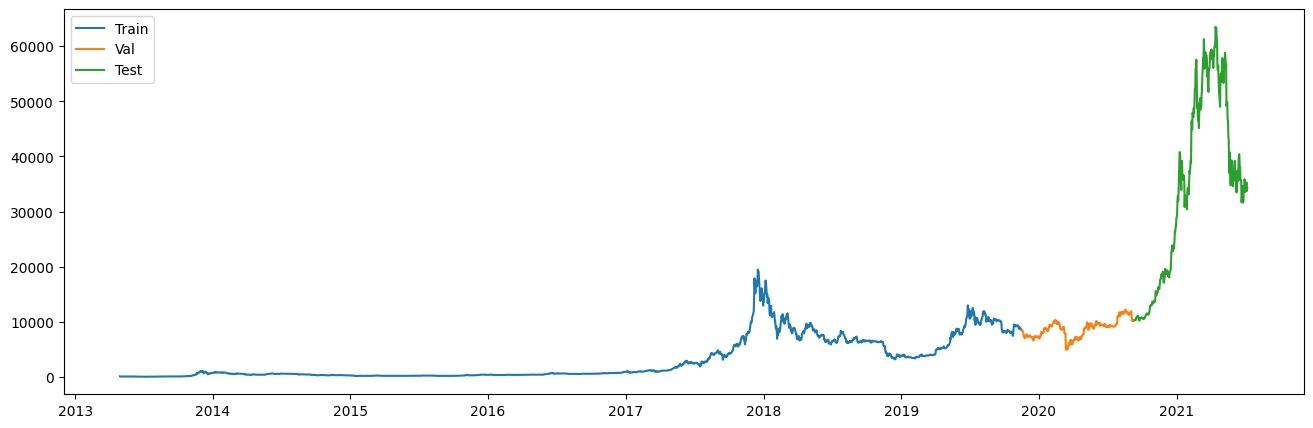

In [10]:
# Graficamos para ver que esten de forma consecutiva

fig, ax = plt.subplots(figsize = (16, 5))
ax.plot(tr, label="Train")
ax.plot(vl, label="Val")
ax.plot(ts,label="Test")
plt.legend()
plt.show()

## Bloques para el dataseet ##



In [11]:
import numpy as np


def crear_dataset_supervisado(array, input_legth, output_legth):
    """
    Perimite crear un dataset con las entradas (x) y salidas (y)
    requeridas por la Red LSTM

    Parametros:
    - array: arreglo numpy de tamaño N x features
    (N: cantidad de datos, f: cantidad de features)

    - input_legth: instantes de tiempo consecutivos

    - output_leth: insatntes de tiempo a pronosticar
    (salidas del modelo)
    """

    #inicializacion

    X, Y = [], []
    #funcion para datos univariados o multivariados
    shape = array.shape
    if len(shape)==1: #si es uni
        fils, cols = array.shape[0], 1
        array = array.reshape(fils, cols)
    else:
        fils, cols = array.shape #multi
    
    # Genero arreglos
    for i in range(fils-input_legth-output_legth):
        X.append(array[i:i+INPUT_LEGTH, 0:cols])
        Y.append(array[i+ input_legth :i+input_legth+output_legth, -1].reshape(output_legth, 1))

    X = np.array(X)
    Y = np.array(Y)

    return X, Y
    

In [12]:
# Crear los datasets 

INPUT_LEGTH = 30 #primer instancia por el mes
OUTPUT_LEGTH = 1

x_tr, y_tr = crear_dataset_supervisado(tr.values, INPUT_LEGTH, OUTPUT_LEGTH)
x_vl, y_vl = crear_dataset_supervisado(tr.values, INPUT_LEGTH, OUTPUT_LEGTH)
x_ts, y_ts = crear_dataset_supervisado(ts.values, INPUT_LEGTH, OUTPUT_LEGTH)

print("Tamaños de entrada y salida")
print(f"set entrenamiento - x_tr: {x_tr.shape}, y_tr: {y_tr.shape} ")
print(f"set de validacion - x_vl: {x_vl.shape}, y_vl: {y_vl.shape} ")
print(f"set de prueba - x_ts: {x_ts.shape}, y_ts: {y_ts.shape} ")


Tamaños de entrada y salida
set entrenamiento - x_tr: (2361, 30, 1), y_tr: (2361, 1, 1) 
set de validacion - x_vl: (2361, 30, 1), y_vl: (2361, 1, 1) 
set de prueba - x_ts: (269, 30, 1), y_ts: (269, 1, 1) 


In [13]:
#ESCALAMIENTO

from sklearn.preprocessing import MinMaxScaler

def escalar_dataset(data_input):
    """"
    Escala el dataset en el rango 0 a 1
    
    entradas:
    data_input: entrada y salida

    retorna:
    - data scaled
    """

    NFEATS = data_input["x_tr"].shape[2]
    scalers = [MinMaxScaler(feature_range=(0, 1)) for i in range(NFEATS)]

    #arreglos escalados
    x_tr_s = np.zeros(data_input["x_tr"].shape)
    x_vl_s = np.zeros(data_input["x_vl"].shape)
    x_ts_s = np.zeros(data_input["x_ts"].shape)

    y_tr_s = np.zeros(data_input["y_tr"].shape)
    y_vl_s = np.zeros(data_input["y_vl"].shape)
    y_ts_s = np.zeros(data_input["y_ts"].shape)

    #escalamiento Xs
    for i in range(NFEATS):
        x_tr_s[:,:,i] = scalers[i].fit_transform(x_tr[:,:,i])
        x_vl_s[:,:,i] = scalers[i].transform(x_vl[:,:,i])
        x_ts_s[:,:,i] = scalers[i].transform(x_ts[:,:,i])
    
    y_tr_s[:,:,0] = scalers[-1].fit_transform(y_tr[:,:,0])
    y_vl_s[:,:,0] = scalers[-1].transform(y_vl[:,:,0])
    y_ts_s[:,:,0] = scalers[-1].transform(y_ts[:,:,0])

    #diccionario de salida
    data_scaled = {
        "x_tr_s": x_tr_s, "y_tr_s": y_tr_s,
        "x_vl_s": x_vl_s, "y_vl_s": y_vl_s,
        "x_ts_s": x_ts_s, "y_ts_s": y_ts_s,
    }

    return data_scaled, scalers[0]

In [14]:
# escalamiento con la funcion anterior:
data_in = {
    "x_tr": x_tr, "y_tr": y_tr,
    "x_vl": x_vl, "y_vl": y_vl,
    "x_ts": x_ts, "y_ts": y_ts,
}

data_s, scaler = escalar_dataset(data_in)

x_tr_s, y_tr_s = data_s['x_tr_s'], data_s['y_tr_s']
x_vl_s, y_vl_s = data_s['x_vl_s'], data_s['y_vl_s']
x_ts_s, y_ts_s = data_s['x_ts_s'], data_s['y_ts_s']


# verificacion
print(f'Min x_tr/x_vl/x_ts sin escalamiento: {x_tr.min()}/{x_vl.min()}/{x_ts.min()}')
print(f'Min x_tr/x_vl/x_ts con escalamiento: {x_tr_s.min()}/{x_vl_s.min()}/{x_ts_s.min()}')

print(f'\nMin y_tr/y_vl/y_ts sin escalamiento: {y_tr.min()}/{y_vl.min()}/{y_ts.min()}')
print(f'Min y_tr/y_vl/y_ts con escalamiento: {y_tr_s.min()}/{y_vl_s.min()}/{y_ts_s.min()}')

print(f'\nMax x_tr/x_vl/x_ts sin escalamiento: {x_tr.max()}/{x_vl.max()}/{x_ts.max()}')
print(f'Max x_tr/x_vl/x_ts con escalamiento: {x_tr_s.max()}/{x_vl_s.max()}/{x_ts_s.max()}')

print(f'\nMax y_tr/y_vl/y_ts sin escalamiento: {y_tr.max()}/{y_vl.max()}/{y_ts.max()}')
print(f'Max y_tr/y_vl/y_ts con escalamiento: {y_tr_s.max()}/{y_vl_s.max()}/{y_ts_s.max()}')


Min x_tr/x_vl/x_ts sin escalamiento: 68.43099975585938/68.43099975585938/10246.18649281
Min x_tr/x_vl/x_ts con escalamiento: 0.0/0.0/0.5238443320538294

Min y_tr/y_vl/y_ts sin escalamiento: 68.43099975585938/68.43099975585938/11296.3614282
Min y_tr/y_vl/y_ts con escalamiento: 0.0/0.0/0.5778963465617909

Max x_tr/x_vl/x_ts sin escalamiento: 19497.400390625/19497.400390625/63503.45793019
Max x_tr/x_vl/x_ts con escalamiento: 1.0/1.0/3.2649712732702194

Max y_tr/y_vl/y_ts sin escalamiento: 19497.400390625/19497.400390625/63503.45793019
Max y_tr/y_vl/y_ts con escalamiento: 1.0/1.0/3.2649712732702194


## Creación y entrenamiento del modelo ##

RMSE: error cuadratico medio


In [15]:
# Creación del modelo
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import RMSprop
import tensorflow as tf

# Ajustar parámetros para reproducibilidad del entrenamiento
tf.random.set_seed(123)
tf.config.experimental.enable_op_determinism()

# El modelo
N_UNITS = 128  # Tamaño del estado oculto (h) y de la celda de memoria (c)
INPUT_SHAPE = (x_tr_s.shape[1], x_tr_s.shape[2])  # 30 dias x número de features

modelo = Sequential()
modelo.add(LSTM(N_UNITS, input_shape=INPUT_SHAPE))
modelo.add(Dense(OUTPUT_LEGTH, activation='linear'))  # activación lineal para regresión


C:\Users\Lenovo\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [16]:
def root_mean_squared_error(y_true, y_pred):
    rmse = tf.math.sqrt(tf.math.reduce_mean(tf.square(y_pred - y_true)))
    return rmse

# Compilación
optimizer = RMSprop(learning_rate=5e-5)

modelo.compile(
    optimizer = optimizer,
    loss = root_mean_squared_error,
)

EPOCHS = 80 # Hiperparámetro
BATCH_SIZE = 256 # Hiperparámetro
historia = modelo.fit(
    x = x_tr_s,
    y = y_tr_s,
    batch_size = BATCH_SIZE,
    epochs = EPOCHS,
    validation_data = (x_vl_s, y_vl_s),
    verbose = 2
)

Epoch 1/80
10/10 - 4s - 421ms/step - loss: 0.2008 - val_loss: 0.1182
Epoch 2/80
10/10 - 1s - 131ms/step - loss: 0.1767 - val_loss: 0.1062
Epoch 3/80
10/10 - 1s - 149ms/step - loss: 0.1561 - val_loss: 0.0976
Epoch 4/80
10/10 - 2s - 153ms/step - loss: 0.1355 - val_loss: 0.0891
Epoch 5/80
10/10 - 2s - 173ms/step - loss: 0.1145 - val_loss: 0.0809
Epoch 6/80
10/10 - 2s - 156ms/step - loss: 0.0941 - val_loss: 0.0729
Epoch 7/80
10/10 - 3s - 259ms/step - loss: 0.0767 - val_loss: 0.0635
Epoch 8/80
10/10 - 1s - 137ms/step - loss: 0.0624 - val_loss: 0.0515
Epoch 9/80
10/10 - 1s - 140ms/step - loss: 0.0500 - val_loss: 0.0410
Epoch 10/80
10/10 - 2s - 201ms/step - loss: 0.0412 - val_loss: 0.0331
Epoch 11/80
10/10 - 2s - 151ms/step - loss: 0.0362 - val_loss: 0.0272
Epoch 12/80
10/10 - 3s - 251ms/step - loss: 0.0336 - val_loss: 0.0233
Epoch 13/80
10/10 - 1s - 126ms/step - loss: 0.0326 - val_loss: 0.0213
Epoch 14/80
10/10 - 2s - 170ms/step - loss: 0.0322 - val_loss: 0.0205
Epoch 15/80
10/10 - 2s - 196m

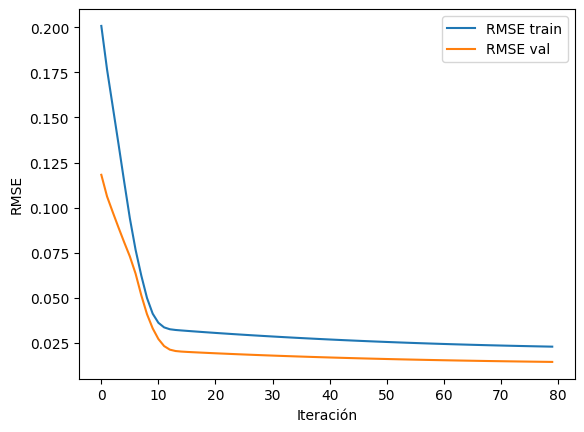

In [17]:
# Graficar curvas de entrenamiento y validación
# para verificar que no existe overfitting
plt.plot(historia.history['loss'],label='RMSE train')
plt.plot(historia.history['val_loss'],label='RMSE val')
plt.xlabel('Iteración')
plt.ylabel('RMSE')
plt.legend()
plt.show()

In [18]:
# Cálculo de rmses para train, val y test
rmse_tr = modelo.evaluate(x=x_tr_s, y=y_tr_s, verbose=0)
rmse_vl = modelo.evaluate(x=x_vl_s, y=y_vl_s, verbose=0)
rmse_ts = modelo.evaluate(x=x_ts_s, y=y_ts_s, verbose=0)

# Imprimir resultados en pantalla
print('Comparativo desempeños:')
print(f' RMSE train:\t {rmse_tr:.3f}')
print(f' RMSE val:\t {rmse_vl:.3f}')
print(f' RMSE test:\t {rmse_ts:.3f}')

Comparativo desempeños:
 RMSE train:	 0.013
 RMSE val:	 0.013
 RMSE test:	 0.288


In [19]:
def predecir(x, model, scaler):
    # Calcular predicción escalada en el rango de 0 a 1
    y_pred_s = model.predict(x,verbose=0)

    # Llevar la predicción a la escala original
    y_pred = scaler.inverse_transform(y_pred_s)

    return y_pred.flatten()

# Calcular predicciones sobre el set de prueba
y_ts_pred = predecir(x_ts_s, modelo, scaler)

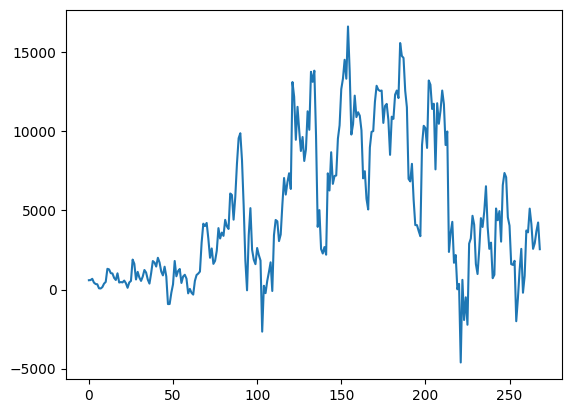

In [20]:
N = len(y_ts_pred)
ndato = np.linspace(1,N,N)

errores = y_ts.flatten()-y_ts_pred
plt.plot(errores)
plt.show()

In [21]:
# Extraer fechas del set de prueba para poder graficar con fechas
fechas_ts_mas1 = ts.index[INPUT_LEGTH +1:]  #la ventana 30 mas 1 la prediccion

print("fechas_ts:", len(fechas_ts_mas1))
print("y_ts:", len(y_ts))
print("y_ts_pred:", len(y_ts_pred))

# Extraer fechas del set de prueba para poder graficar con fechas
fechas_ts_menos1 = ts.index[INPUT_LEGTH:-1]  

print("fechas_ts:", len(fechas_ts_menos1))
print("y_ts:", len(y_ts))
print("y_ts_pred:", len(y_ts_pred))

fechas_ts: 269
y_ts: 269
y_ts_pred: 269
fechas_ts: 269
y_ts: 269
y_ts_pred: 269


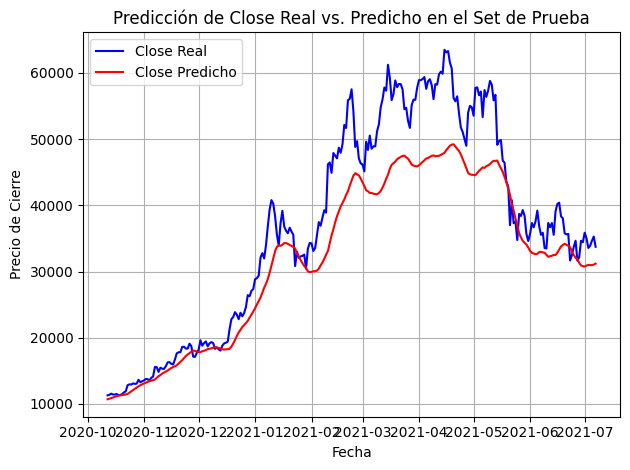

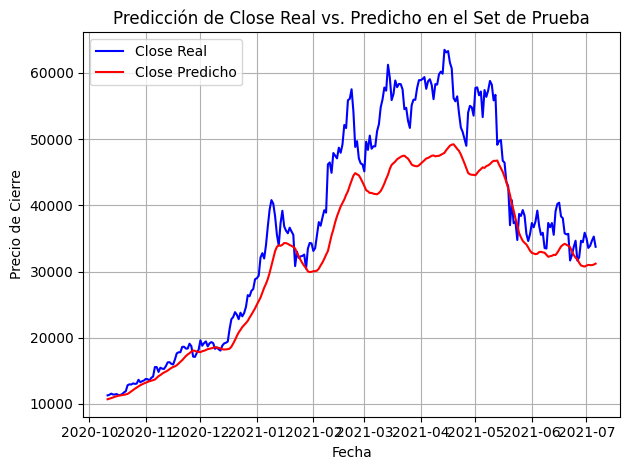

In [23]:
#Graficamos+1
#plt.figure(figsize=(12, 6))
plt.plot(fechas_ts_mas1, y_ts.flatten(), label='Close Real', color='blue')
plt.plot(fechas_ts_mas1, y_ts_pred.flatten(), label='Close Predicho', color='red')
plt.title("Predicción de Close Real vs. Predicho en el Set de Prueba")
plt.xlabel("Fecha")
plt.ylabel("Precio de Cierre")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#Graficamos-1
#plt.figure(figsize=(12, 6))
plt.plot(fechas_ts_menos1, y_ts.flatten(), label='Close Real', color='blue')
plt.plot(fechas_ts_menos1, y_ts_pred.flatten(), label='Close Predicho', color='red')
plt.title("Predicción de Close Real vs. Predicho en el Set de Prueba")
plt.xlabel("Fecha")
plt.ylabel("Precio de Cierre")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()